In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import numpy as np
import xarray as xr
import os
from glob import glob

In [2]:
def convert_time_to_spm(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [3]:
# Read in relevant metadata and INP concentrations.
filter_info = pd.read_csv('/home/users/erinraif/mphase_data/metadata/M-Phase_filter_master.csv', index_col='unique_ID')
# Drop filter runs negated (c276r3 due to issues during experiment, c278r3 due to short run length)
#filter_info = filter_info.drop(['c276r3t','c278r3t'])
INP_concentrations = pd.read_csv('/home/users/erinraif/mphase_data/inp_data/mphase_ER_CAOs.csv', index_col='temp_bin')

In [4]:
filter_info['start_time_spm'] = filter_info['start_time'].apply(convert_time_to_spm)
filter_info['end_time_spm'] = filter_info['end_time'].apply(convert_time_to_spm)

In [ ]:
filter_info = pd.merge(filter_info, label_locs, left_index=True, right_index=True)

In [5]:
def get_filter_extents(row):
    # For each row of filter metadata, collect latitude and longitude data
    flight_data = xr.open_dataset(
                    glob('/badc/faam/data/2022/'+
                         row.flight.lower()+'*/core_processed/core_faam*'
                         +row.flight.lower()+'.nc')[-1],
                    decode_times=False,engine='netcdf4')

    time_slice = flight_data.sel(Time=slice(row.start_time_spm, row.end_time_spm))
    lat = time_slice['LAT_GIN'][:,0]
    lon = time_slice['LON_GIN'][:,0]
    row['mean_lat'] = lat.mean().values
    row['mean_lon'] = lon.mean().values
    row['east'] = lon.max().values
    row['west'] = lon.min().values
    row['north'] = lat.max().values
    row['south'] = lat.min().values
    return row


In [6]:
filter_info = filter_info.apply(lambda row: get_filter_extents(row), axis=1)

In [22]:
filter_info

,unique_ID_MT,date,flight,flight_start,flight_stop,alt_ft,nw_cao,above_below_cloud,filter_run,filter_id,...,avg_particle_conc,flags,start_time_spm,end_time_spm,mean_lat,mean_lon,east,west,north,south
unique_ID,,,,,,,,,,,,,,,,,,,,,
C319r1t,"221018_C319_T1_6,000ft",18/10/2022,C319,14:16:34,18:14:41,6000,no,above,1,T1,...,NaN,shakedown_flight,54990,56672,57.775043,-58.83671,-58.043434,-59.824398,58.418278,57.04673
C319r5t,"221018_C319_T5_12,000ft",18/10/2022,C319,14:16:34,18:14:41,12000,no,far_above,3,T5,...,NaN,shakedown_flight,60243,63408,56.551445,-59.6898,-58.0189,-60.67511,58.271027,54.997334
C320r1t,"221021_C320_T1_1,000ft",21/10/2022,C320,14:10:44,18:06:37,1000,no,below,1,T1,...,NaN,aerosol_flight,53700,54900,57.077415,-60.861645,-60.394924,-61.32932,57.642258,56.50782
C320r2t,221021_C320_T2_450ft,21/10/2022,C320,14:10:44,18:06:37,450,no,below,2,T2,...,NaN,aerosol_flight,55260,56460,58.53466,-62.116035,-61.6148,-62.637665,59.10344,57.968353
C320r3t,"221021_C320_T3_1,000 ft",21/10/2022,C320,14:10:44,18:06:37,1000,no,below,3,T3,...,NaN,aerosol_flight,56640,57840,59.82615,-63.328243,-62.79534,-63.8724,60.375366,59.275375
C320r4t,"221021_C320_T4_15,000ft",21/10/2022,C320,14:10:44,18:06:37,15000,no,far_above,4,T4,...,NaN,aerosol_flight,59880,62100,57.60264,-61.310932,-60.338818,-62.32492,58.768295,56.43266
C321r1t,"221023_C321_T1_10,000ft",23/10/2022,C321,14:02:07,18:11:45,10000,yes,above,2,T1,...,NaN,NaN,54435,55658,58.183857,-57.39489,-56.96368,-57.84892,58.86325,57.513035
C321r3t,221023_C321_T3_500ft,23/10/2022,C321,14:02:07,18:11:45,500,yes,below,4,T3,...,NaN,NaN,59984,61786,58.896206,-62.434177,-61.61621,-63.327065,59.7219,58.0729
C322r1t,"221024_C322_T1_1,500ft",24/10/2022,C322,11:59:21,16:03:13,1500,yes,below,1,T1,...,NaN,NaN,46958,48498,57.998386,-57.804905,-57.39575,-58.20778,58.670074,57.32511


In [7]:
PC = ccrs.PlateCarree()

In [8]:
def create_map_basis(ax):
    ax.set_extent([-64, -48, 50, 62], crs=PC)
    gl = ax.gridlines(crs=PC, zorder=6, draw_labels=True, x_inline = False,
                      y_inline = False, linewidth=0.5, linestyle=(0, (5, 1)))
    #gl.n_steps = 60
    gl.ylocator = mticker.FixedLocator(np.arange(50,66, 2))
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlocator = mticker.FixedLocator(np.arange(-64, -46, 2))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.top_labels = False
    gl.right_labels = False

def make_map_elements(ax,add=True):
    # define the coastlines, oceans and land shapes
    coasts_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', 
                                              edgecolor='black',
                                              facecolor= 'none')
    
    ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face',
                                            facecolor='lightblue')
    
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',
                                            facecolor='lightgray')
    
    # add all to the map
    if add:
        ax.add_feature(ocean_50m, zorder = 1, alpha = 0.4)
        ax.add_feature(land_50m, zorder = 4, alpha = 0.4)
        ax.add_feature(coasts_50m, zorder = 5, linewidth = 0.5)

def make_map(ax, add=True):
    create_map_basis(ax)
    make_map_elements(ax,add=True)

In [15]:
def plot_filter_legs(ax1, ax2, row, conc_df, cm, norm):
    # For each row of metadata, plot associated filter track
    flight_data = xr.open_dataset(
                    glob('/badc/faam/data/2022/'+
                         row.flight.lower()+'*/core_processed/core_faam*'
                         +row.flight.lower()+'.nc')[-1],
                    decode_times=False,engine='netcdf4')
    time_slice = flight_data.sel(Time=slice(row.start_time_spm, row.end_time_spm))
    lat = time_slice['LAT_GIN'][:,0]
    lon = time_slice['LON_GIN'][:,0]
    # Choose colour for ax1 plot based on run type
    # if row.name in ('C322r2t', 'C319r1t','C326r2t','C319r5t','C330r2t',
    #                 'C327r4t','C323r3t','C331r4t','C322r2t','C329r3t',
    #                'C328r2t','C321r1t','C320r3t','C324r5t','C325r4t',
    #                'C329r2t','C327r2t','C328r1t','C326r1t','C329r1t',
    #                 'C327r1t','C330r1t','C331r3t','C332r1t','C332r2t',
    #                 'C324r1t','C324r2t','C325r1t','C325r2t','C323r4t',
    #                'C322r1t','C333r1t','C333r2t','C333r3t','C321r3t',
    #                'C320r4t'):
    if row.name == 'dummy':
        pass
    else:
        if row.name in ('C320r1t','C320r2t'):
            if row.nw_cao == 'yes' and (row.above_below_cloud in ('above','far_above')):
                ls = '-'
            elif row.nw_cao == 'yes' and row.above_below_cloud == 'below':
                ls = '--'
            elif row.nw_cao == 'no' and (row.above_below_cloud in ('above','far_above')):
                ls = ':'
            else:
                ls = '-.'
            ax1.plot(lon, lat, zorder=6, linestyle=ls, label=row.name)
    # Get the temperature at which N_INP = 0.5 per L
    # if row.name.lower() + '_NT' in conc_df:
    #     T_500percm3 = np.interp(0.1, conc_df[row.name.lower()+'_NT'].dropna(), 
    #                             conc_df[row.name.lower()+'_NT'].dropna().index)    
    #     # Choose colour for plot based on this value and plot on ax2
    #     c = cm(norm(T_500percm3))
    #     ax2.plot(lon, lat, color=c, zorder=6)
    
    return row

In [26]:
def interpolate_colors(colormap, levels, value):
    # Normalize a value to [0, 1] based on the levels
    normalized_value = (value - levels[0]) / (levels[-1] - levels[0])
    # Map the normalized value to the colormap
    return colormap(normalized_value)


/tmp/ipykernel_934/2847892090.py:32: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()
/tmp/ipykernel_934/2847892090.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_934/2847892090.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


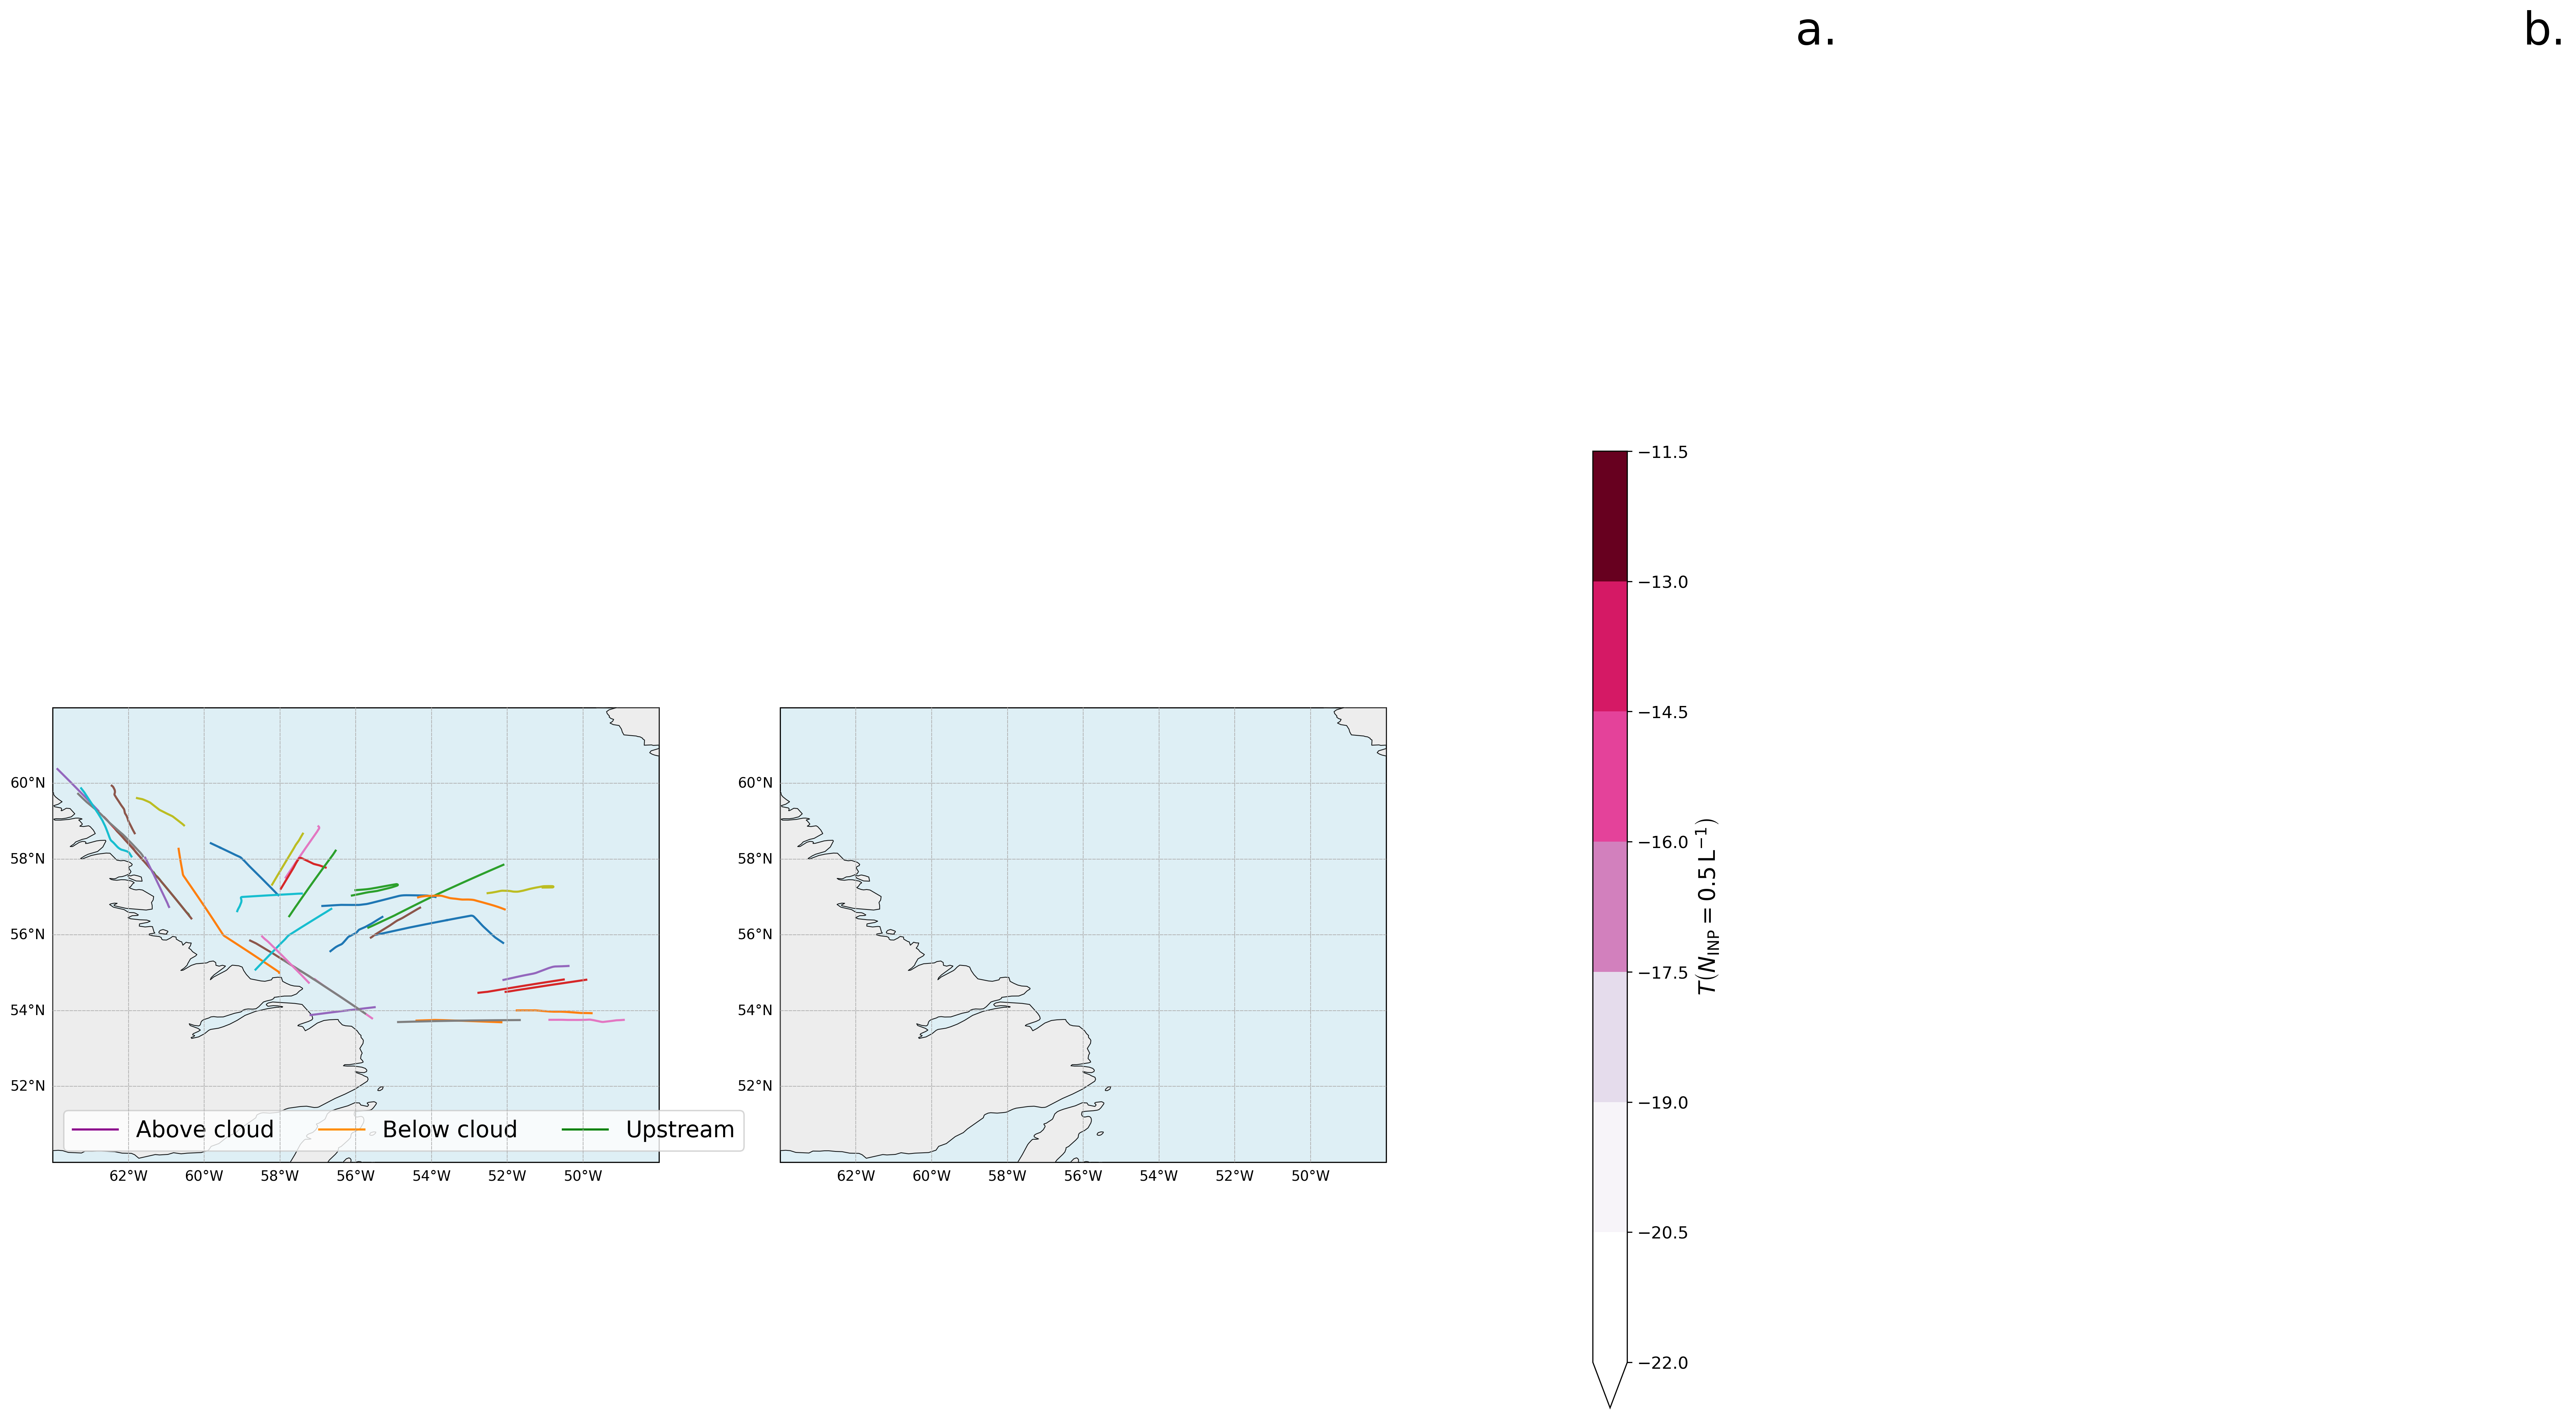

In [37]:
# Create a discretised colormap based on the PuRd
color_levels = [-22,-20.5, -19, -17.5, -16, -14.5, -13, -11.5]
cmap_reds = plt.cm.PuRd
custom_colors = ['#ffffff'] + [interpolate_colors(cmap_reds, color_levels, level) for level in color_levels]
cmap_reds_discrete = mcolors.ListedColormap(custom_colors)
# Use this colormap for normalization
norm = mcolors.BoundaryNorm(color_levels, cmap_reds_discrete.N)
cm = cmap_reds_discrete
# Make plot
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(17,10.5),
                       subplot_kw=dict(projection=PC),dpi=300)
for ax in (ax1, ax2):
    make_map(ax, add=True)
# Plot filter tracks and annotate them
filter_info = filter_info.apply(lambda row: plot_filter_legs(ax1, ax2, row,
                                                             INP_concentrations,
                                                             cm, norm), axis=1)
plt.draw()
# _ = filter_info.apply(lambda row: add_annotation(row,ax1,True),axis=1)
# _ = filter_info.apply(lambda row: add_annotation(row,ax2,False),axis=1)
# "Hidden" plots to create legend
ax1.plot([0,1],[0,1],transform = ccrs.PlateCarree(),color='darkmagenta',
        label='Above cloud')
ax1.plot([0,1],[0,1],transform = ccrs.PlateCarree(),color='darkorange',
        label='Below cloud')
ax1.plot([0,1],[0,1],transform = ccrs.PlateCarree(),color='green',
        label='Upstream')
ax1.legend(loc='lower left',ncol=3,fontsize=16)

ax1.text(-18,79.5,"a.",size=32,transform=PC,zorder=20)
ax2.text(-18,79.5,"b.",size=32,transform=PC,zorder=20)
fig.tight_layout()
cb_ax = fig.add_axes([1.02, 0.05, 0.02, 0.9])
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
# Now, create a vertical colorbar on the additional axis
cb = fig.colorbar(sm, cax=cb_ax, orientation="vertical", extend='min')
cb.set_label(r'$T\left(N_{\mathrm{INP}}=0.5\,\mathrm{L^{-1}}\right)$', fontsize=16)
cb.ax.tick_params(labelsize=12) 
# Note warning appeats here due to the presence of cb_ax - safely ignored
fig.tight_layout()

In [ ]:
def add_annotation(row, ax, color=True):
    # Choose colour for text if wanted (for ax1 case)
    # if color:
    #     if row.layer == 'above':
    #         c = 'darkmagenta'
    #     elif row.layer == 'below':
    #         c = 'orangered'
    #     elif row.layer == 'upstream':
    #         c = 'darkgreen'
    #     else:
    #         c = 'black'
    # else:
    #     c = 'black'
    
    extent = ax.get_extent()

    # Calculate co-ordinates of label top-left corner in NPS
    label_NPS_x = extent[0] + (extent[1] - extent[0]) * row.x_extent
    label_NPS_y = extent[3] + (extent[2]-extent[3]) * row.y_extent
    label_lon, label_lat = PC.transform_point(label_NPS_x, label_NPS_y, NPS)
    t = ax.text(label_lon, label_lat, row.name[:-1],
                 #transform=ccrs.PlateCarree(),
                 horizontalalignment='left',
                 verticalalignment='top',
                 color = c,
                 fontsize = 12,
                 zorder=7
                )
    # Get the bounding box of the text object in display coordinates
    bbox = t.get_window_extent()
    # Get start
    if row.y_extent < 0.89:
        # Find the left and right-most extent (x-coordinate) of the bounding box in pt
        left_extent_pt = bbox.x0
        right_extent_pt = bbox.x1
        # Get bounding box height midpoint in pt
        box_height_mp_pt = (bbox.y0+bbox.y1)/2
        # Convert to NPS x,y
        left_extent_NPS = ax.transData.inverted().transform((left_extent_pt, 0))[0]
        right_extent_NPS = ax.transData.inverted().transform((right_extent_pt, 0))[0]
        box_height_mp_NPS = ax.transData.inverted().transform((0, box_height_mp_pt))[1]
        if row.x_extent < 0.5: # LHS
             arrow_start_NPS = (right_extent_NPS, box_height_mp_NPS)
        else: # RHS
            arrow_start_NPS = (left_extent_NPS, box_height_mp_NPS)
    else:  # bottom row
        # Find the top of the bounding box
        top_extent_pt = bbox.y1
        # Get bounding box width midpoint in pt
        box_width_mp_pt = (bbox.x0+bbox.x1)/2
        # Convert to NPS x,y
        top_extent_NPS = ax.transData.inverted().transform((0, top_extent_pt))[1]
        box_width_mp_NPS = ax.transData.inverted().transform((box_width_mp_pt,0))[0]
        arrow_start_NPS = (box_width_mp_NPS, top_extent_NPS)

    # Check where endpoint of arrow should be and retrieve from metadata
    if row.end[0] == 'N':
        arrow_end_lat = row.north
    elif row.end[0] == 'S':
        arrow_end_lat = row.south
    elif row.end[0] == 'M':
        arrow_end_lat = row.mean_lat
    if row.end[1] == 'E':
        arrow_end_lon = row.east
    elif row.end[1] == 'W':
        arrow_end_lon = row.west
    elif row.end[1] == 'M':
        arrow_end_lon = row.mean_lon

    # Plot arrow
    arrow_end_NPS = NPS.transform_point(arrow_end_lon, arrow_end_lat, PC)
    arrow = ax.annotate("", xy=arrow_end_NPS, xytext=arrow_start_NPS,
                        arrowprops=dict(arrowstyle='->', linewidth=1,color='gray'), transform=NPS,
                       zorder=1000)
    
    return

In [13]:
ax2=None
cm=None
norm=None

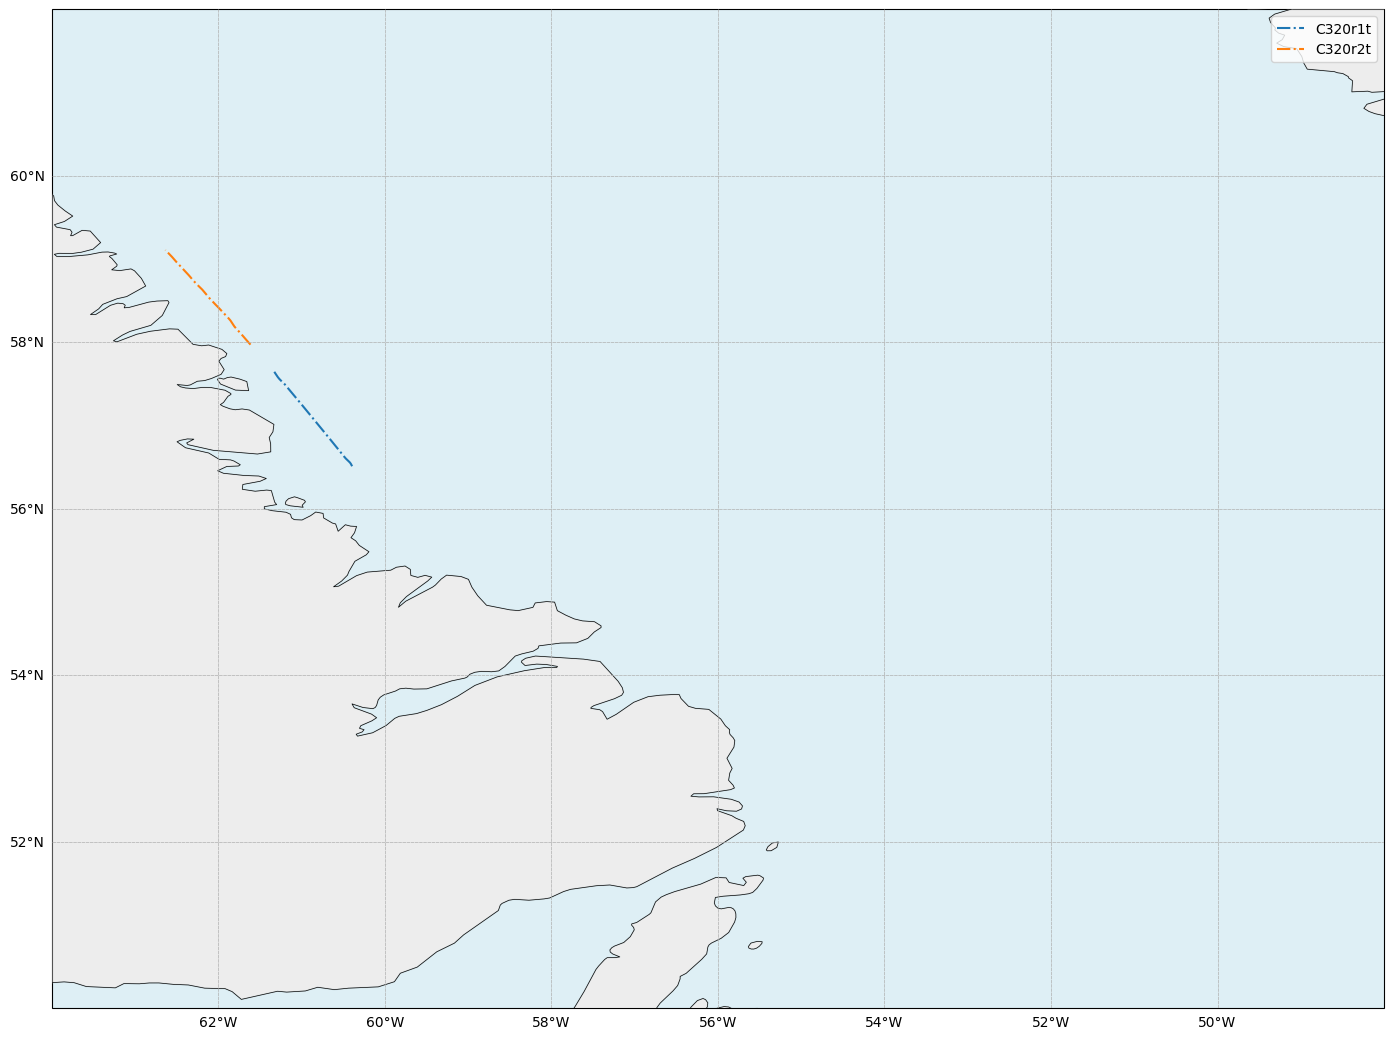

In [16]:
# Create a discretised colormap based on the PuRd
# Make plot
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(17,10.5),
                       subplot_kw=dict(projection=PC),dpi=100)

make_map(ax, add=True)
# Plot filter tracks and annotate them
filter_info = filter_info.apply(lambda row: plot_filter_legs(ax, ax2, row,
                                                             INP_concentrations,
                                                             cm, norm), axis=1)
plt.draw()
ax.legend()
# _ = filter_info.apply(lambda row: add_annotation(row,ax1,True),axis=1)
# _ = filter_info.apply(lambda row: add_annotation(row,ax2,False),axis=1)
# "Hidden" plots to create legend
#ax.legend(loc='lower left',ncol=3,fontsize=16)
# Note warning appeats here due to the presence of cb_ax - safely ignored
fig.tight_layout()